### Notebook: using jsonstat.py python library with jsonstat format version 1.

This Jupyter notebook shows the python library [jsonstat.py](http://github.com/26fe/jsonstat.py) in action. The [JSON-stat](https://json-stat.org/) is a simple lightweight JSON dissemination format. For more information about the format see the [official site](https://json-stat.org/). This example shows how to explore the example data file [oecd-canada](http://json-stat.org/samples/oecd-canada.json) from json-stat.org site. This file is complaint to the version 1 of jsonstat.

In [1]:
# all import here
from __future__ import print_function
import os
import pandas as ps # using panda to convert jsonstat dataset to pandas dataframe
import jsonstat     # import jsonstat.py package

import matplotlib as plt  # for plotting 

In [2]:
%matplotlib inline

Download or use cached file oecd-canada.json. Caching file on disk permits to work off-line and to speed up the exloration of the data.

In [3]:
url = 'http://json-stat.org/samples/oecd-canada.json'
file_name = "oecd-canada.json"

file_path = os.path.abspath(os.path.join("..", "tests", "fixtures", "json-stat.org", file_name))
if os.path.exists(file_path):
    print("using already downloaded file {}".format(file_path))
else:
    print("download file and storing on disk")
    jsonstat.download(url, file_name)
    file_path = file_name

using already downloaded file /Users/26fe_nas/gioprj.on_mac/prj.python/jsonstat.py/tests/fixtures/json-stat.org/oecd-canada.json


Initialize JsonStatCollection from the file and print the list of dataset contained into the collection.

In [4]:
collection = jsonstat.from_file(file_path)
collection

JsonstatCollection contains the following JsonStatDataSet:
+-----+----------+
| pos | dataset  |
+-----+----------+
| 0   | 'oecd'   |
| 1   | 'canada' |
+-----+----------+

Select the dataset named `oedc`. Oecd dataset has three dimensions (concept, area, year), and contains 432 values.

In [5]:
oecd = collection.dataset('oecd')
oecd

name:   'oecd'
label:  'Unemployment rate in the OECD countries 2003-2014'
source: 'Unemployment rate in the OECD countries 2003-2014'
size: 432
+-----+---------+--------------------------------+------+--------+
| pos | id      | label                          | size | role   |
+-----+---------+--------------------------------+------+--------+
| 0   | concept | indicator                      | 1    | metric |
| 1   | area    | OECD countries, EU15 and total | 36   | geo    |
| 2   | year    | 2003-2014                      | 12   | time   |
+-----+---------+--------------------------------+------+--------+

Shows some detailed info about dimensions

In [6]:
for d in oecd.dimensions():
    print("info for dimensions '{}'".format(d.did()))
    d.info()

info for dimensions 'concept'
+-----+-------+---------------------+
| pos | idx   | label               |
+-----+-------+---------------------+
| 0   | 'UNR' | 'unemployment rate' |
+-----+-------+---------------------+
info for dimensions 'area'
+-----+--------+----------------------------+
| pos | idx    | label                      |
+-----+--------+----------------------------+
| 0   | 'AU'   | 'Australia'                |
| 1   | 'AT'   | 'Austria'                  |
| 2   | 'BE'   | 'Belgium'                  |
| 3   | 'CA'   | 'Canada'                   |
| 4   | 'CL'   | 'Chile'                    |
| 5   | 'CZ'   | 'Czech Republic'           |
| 6   | 'DK'   | 'Denmark'                  |
| 7   | 'EE'   | 'Estonia'                  |
| 8   | 'FI'   | 'Finland'                  |
| 9   | 'FR'   | 'France'                   |
| 10  | 'DE'   | 'Germany'                  |
| 11  | 'GR'   | 'Greece'                   |
| 12  | 'HU'   | 'Hungary'                  |
| 13  | 'IS'   | 

#### Accessing value in the dataset

Print the value in oecd dataset for area = IT and year = 2012

In [7]:
oecd.value(area='IT', year='2012')

10.55546863

In [8]:
oecd.value(concept='unemployment rate',area='Australia',year='2004') # 5.39663128

5.39663128

In [9]:
oecd.value(concept='UNR',area='AU',year='2004')

5.39663128

#### Trasforming dataset into pandas DataFrame



In [10]:
df_oecd = oecd.to_data_frame('year', content='id')
df_oecd.head()

,concept,area,Value
year,,,
2003,UNR,AU,5.943826
2004,UNR,AU,5.396631
2005,UNR,AU,5.044791
2006,UNR,AU,4.789363
2007,UNR,AU,4.379649


In [11]:
df_oecd['area'].describe() # area contains 36 values

count     432
unique     36
top        FI
freq       12
Name: area, dtype: object

Extract a subset of data in a pandas dataframe from the jsonstat dataset.
We can trasform dataset freezing the dimension area to a specific country (Canada)

In [12]:
df_oecd_ca = oecd.to_data_frame('year', content='id', blocked_dims={'area':'CA'})
df_oecd_ca.tail()

,concept,area,Value
year,,,
2010,UNR,CA,7.988900
2011,UNR,CA,7.453610
2012,UNR,CA,7.323584
2013,UNR,CA,7.169742
2014,UNR,CA,6.881227


In [13]:
df_oecd_ca['area'].describe()  # area contains only one value (CA)

count     12
unique     1
top       CA
freq      12
Name: area, dtype: object

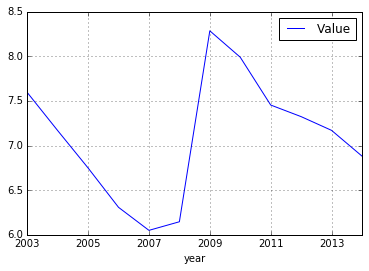

In [14]:
df_oecd_ca.plot(grid=True)

#### Trasforming a dataset into a python list

In [15]:
oecd.to_table()[:5]

[['indicator', 'OECD countries, EU15 and total', '2003-2014', 'Value'],
 ['unemployment rate', 'Australia', '2003', 5.943826289],
 ['unemployment rate', 'Australia', '2004', 5.39663128],
 ['unemployment rate', 'Australia', '2005', 5.044790587],
 ['unemployment rate', 'Australia', '2006', 4.789362794]]

It is possible to trasform jsonstat data into table in different order 

In [16]:
order = [i.did() for i in oecd.dimensions()]
order = order[::-1]  # reverse list
table = oecd.to_table(order=order)
table[:5]

[['indicator', 'OECD countries, EU15 and total', '2003-2014', 'Value'],
 ['unemployment rate', 'Australia', '2003', 5.943826289],
 ['unemployment rate', 'Austria', '2003', 4.278559338],
 ['unemployment rate', 'Belgium', '2003', 8.158333333],
 ['unemployment rate', 'Canada', '2003', 7.594616751]]